# circle - non linear dataset 

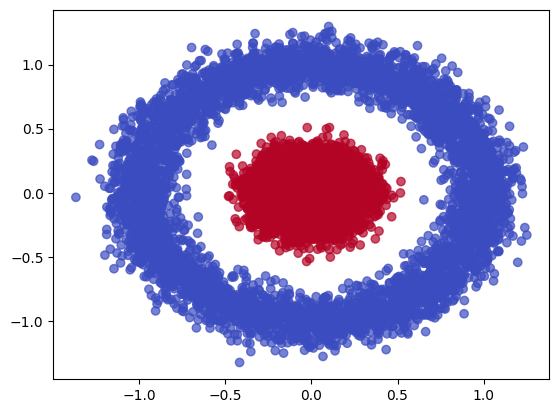

In [ ]:
X, y = make_circles(n_samples=10000, noise=0.1, factor=0.2, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [ ]:
df_circles = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df_circles["target"] = y

In [ ]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0


### correlation matrix

In [ ]:
df_circles.iloc[:,:-1].corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_1,1.000000,0.001393,0.022580,0.001003,-0.018082,-0.011407,0.007801,-0.005300,0.012985,-0.004551
Feature_2,0.001393,1.000000,-0.000806,0.017088,0.000188,0.020699,0.003803,0.007357,0.006386,-0.026519
Feature_3,0.022580,-0.000806,1.000000,0.006536,0.003324,-0.000860,0.006982,-0.001933,0.011470,0.004375
Feature_4,0.001003,0.017088,0.006536,1.000000,-0.008750,-0.009000,0.000818,-0.011846,0.001492,-0.003121
Feature_5,-0.018082,0.000188,0.003324,-0.008750,1.000000,0.016541,-0.002767,0.025910,0.014185,-0.009160
Feature_6,-0.011407,0.020699,-0.000860,-0.009000,0.016541,1.000000,0.011298,-0.008635,-0.014979,0.003218
Feature_7,0.007801,0.003803,0.006982,0.000818,-0.002767,0.011298,1.000000,0.007153,-0.009447,-0.018129
Feature_8,-0.005300,0.007357,-0.001933,-0.011846,0.025910,-0.008635,0.007153,1.000000,-0.002528,0.003355
Feature_9,0.012985,0.006386,0.011470,0.001492,0.014185,-0.014979,-0.009447,-0.002528,1.000000,-0.013369
Feature_10,-0.004551,-0.026519,0.004375,-0.003121,-0.009160,0.003218,-0.018129,0.003355,-0.013369,1.000000


<Axes: >

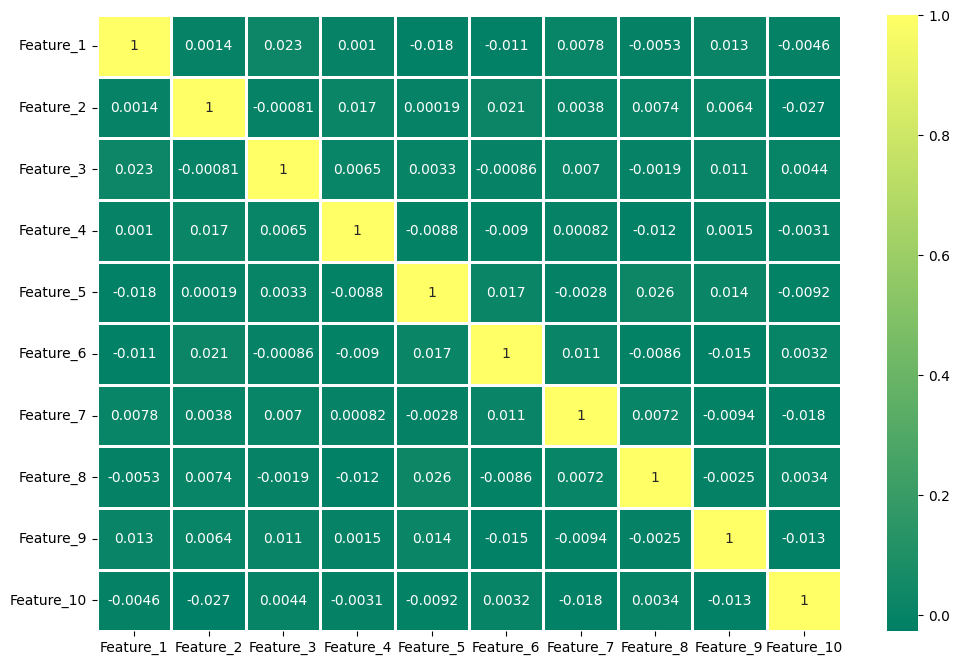

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_circles.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [ ]:
X_values = df_circles.iloc[:,:-1].values

In [ ]:
y_values = df_circles.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_values = scaler.fit_transform(X_values)

In [ ]:
np.mean(X_values),np.std(X_values)

(-1.1510792319313622e-17, 1.0000000000000009)

In [ ]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.309049,0.544134,-0.260872,0.969431,-0.416015,0.004562,-0.041544,0.211212,2.118484,0.071630
1,2.313386,-1.040751,-0.644229,-0.264708,-0.540159,-0.369227,-0.432516,0.367015,-0.032995,-1.555886
2,-1.198062,1.401072,-2.306372,-0.263039,-2.668480,-0.479767,0.349315,1.295610,1.041671,0.275836
3,2.066837,-0.653542,0.051097,1.119056,0.327309,-0.907937,-0.692102,0.199804,2.278849,-0.194856
4,1.626991,-0.965343,-0.044565,-0.956494,-0.160910,0.190105,1.167806,-1.396382,0.657352,1.533913
...,...,...,...,...,...,...,...,...,...,...
9995,0.376839,0.468127,1.648879,-0.496679,0.385145,0.631903,-0.609411,0.401719,-0.785357,-0.693819
9996,0.460620,0.272608,-0.130718,2.304617,0.271242,0.915557,-1.289294,1.170761,1.281491,0.811715
9997,0.207503,0.159001,-0.365479,-2.199463,-2.251007,0.150395,0.021843,-0.601888,0.087734,-1.239820
9998,0.931093,1.713429,1.121027,0.193728,0.724273,-2.025359,-0.135496,-1.443359,-0.423483,0.045305


## pca application

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_general = PCA()

In [ ]:
pca_general.fit(X_values)

PCA()

In [ ]:
explained_variance = pca_general.explained_variance_ratio_

In [ ]:
explained_variance

array([0.10482865, 0.10457455, 0.10290561, 0.1015137 , 0.10045921,
       0.09972371, 0.09859682, 0.09675785, 0.0963815 , 0.09425839])

In [ ]:
eigenvalues = pca_general.explained_variance_

In [ ]:
pd.DataFrame(eigenvalues)

,0
0,1.048391
1,1.045850
2,1.029159
3,1.015239
4,1.004693
5,0.997337
6,0.986067
7,0.967675
8,0.963911
9,0.942678


In [ ]:
eigenvectors = pca_general.components_

### scree plot

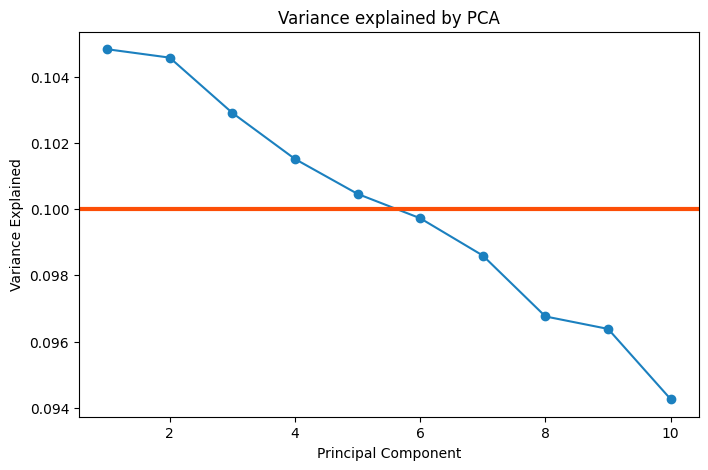

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principal_components = pca.fit_transform(X_values)

In [ ]:
pd.DataFrame(principal_components).head(8)

,0,1
0,0.804045,-1.039221
1,1.264317,-0.322329
2,-0.307069,0.149619
3,2.033067,-0.805982
4,1.308977,0.820787
5,1.227888,0.179251
6,1.098161,-1.310402
7,1.562719,1.195164


In [ ]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [ ]:
final_df = pd.concat([principal_df,df_circles[['target']]],axis=1)

In [ ]:
final_df

,principal component 1,principal component 2,target
0,0.804045,-1.039221,1
1,1.264317,-0.322329,0
2,-0.307069,0.149619,0
3,2.033067,-0.805982,0
4,1.308977,0.820787,0
...,...,...,...
9995,-0.240158,-0.704085,1
9996,0.188798,-0.480918,1
9997,0.626857,0.073266,1
9998,1.535065,-0.953126,0


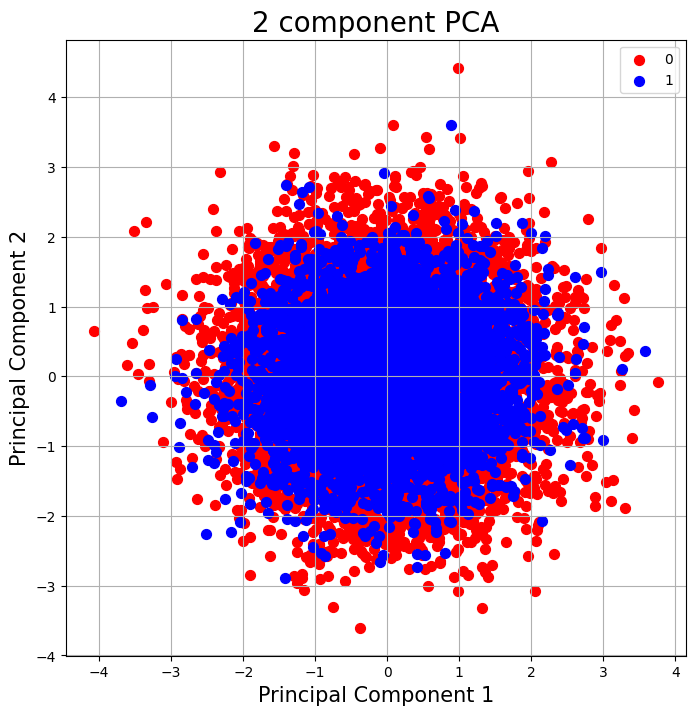

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

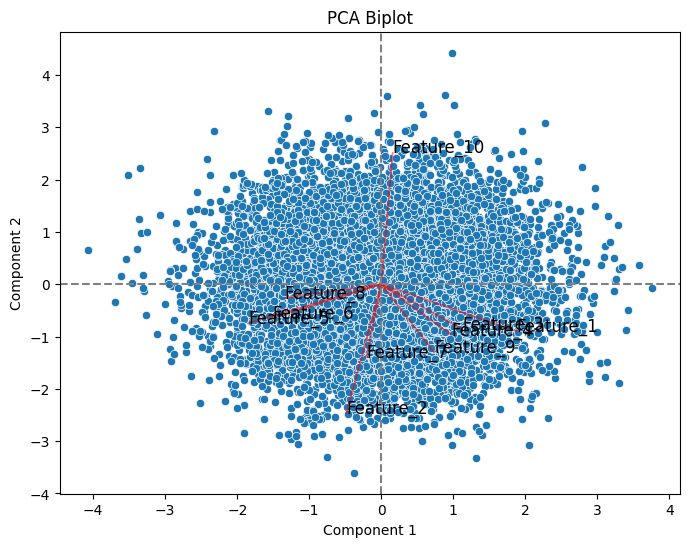

In [ ]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_circles.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

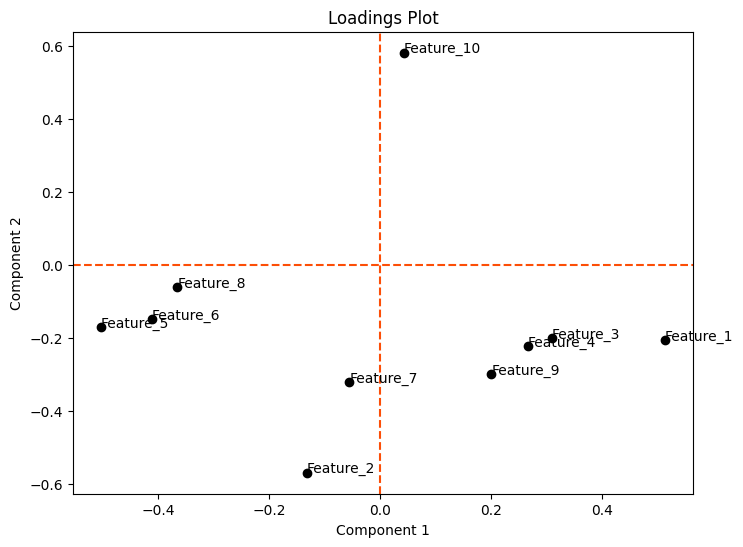

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_circles.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [ ]:
scores_pca = pca.transform(X_values)

In [ ]:
pd.DataFrame(scores_pca).head()

,0,1
0,0.804045,-1.039221
1,1.264317,-0.322329
2,-0.307069,0.149619
3,2.033067,-0.805982
4,1.308977,0.820787


## t-SNE

In [ ]:
tsne = TSNE(n_components=2,random_state=42)

In [ ]:
X_tsne = tsne.fit_transform(X_values)

In [ ]:
tsne_data = np.vstack((X_tsne.T,df_circles['target'])).T

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [ ]:
tsne_df

,dim_1,dim_2,target
0,-5.927684,-15.156049,1.0
1,80.337151,-3.990625,0.0
2,-56.762112,-45.600533,0.0
3,72.041687,-30.501837,0.0
4,62.652184,25.286453,0.0
...,...,...,...
9995,4.593113,11.918267,1.0
9996,-36.303318,21.712233,1.0
9997,46.162605,14.915412,1.0
9998,58.533768,-56.781452,0.0


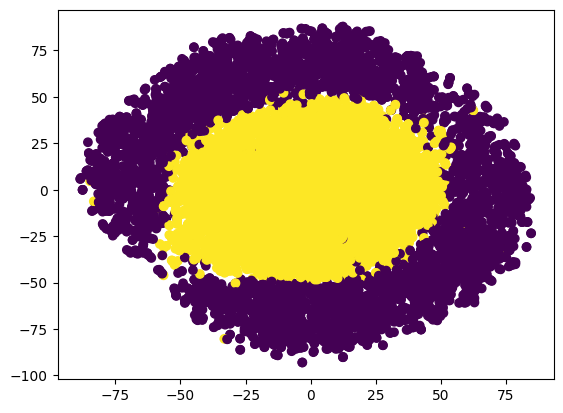

In [ ]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [ ]:
tsne.kl_divergence_

3.1144015789031982

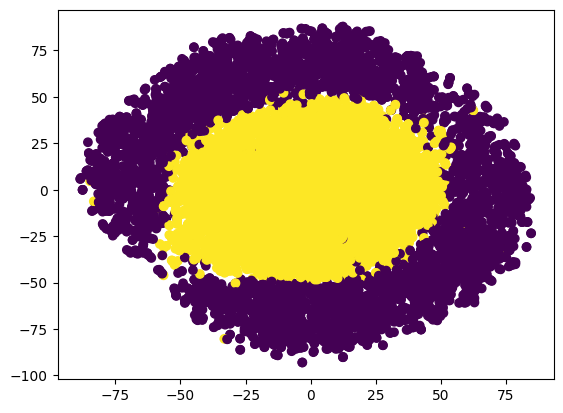

In [ ]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [ ]:
from sklearn.cluster import KMeans

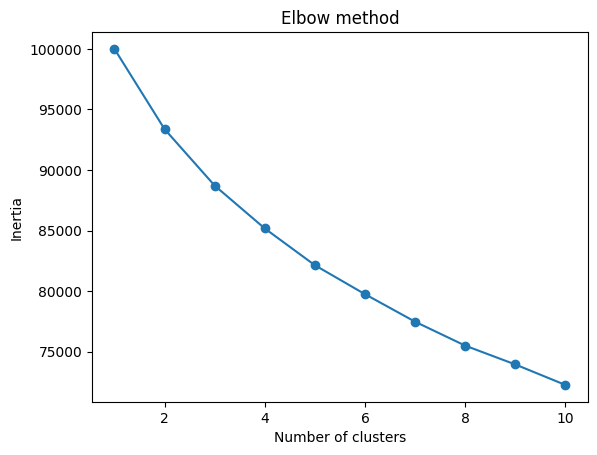

In [ ]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [ ]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_circles['k_means'] = kmeans.labels_

In [ ]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1,1
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0,1
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0,0
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0,1
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1,0
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1,0
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1,1
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0,1


In [ ]:
from scipy.optimize import linear_sum_assignment

y_true = df_circles['target'].values  
y_kmeans = df_circles['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_circles['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_circles['k_means'] == y_true))

accuracy before: 0.4966
accuracy after: 0.5034


In [ ]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1,0
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0,0
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0,1
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0,0
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1,1
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1,1
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1,0
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0,0


In [ ]:
print(np.unique(df_circles['target']))

[0 1]


In [ ]:
print(np.unique(kmeans.labels_))

[0 1]


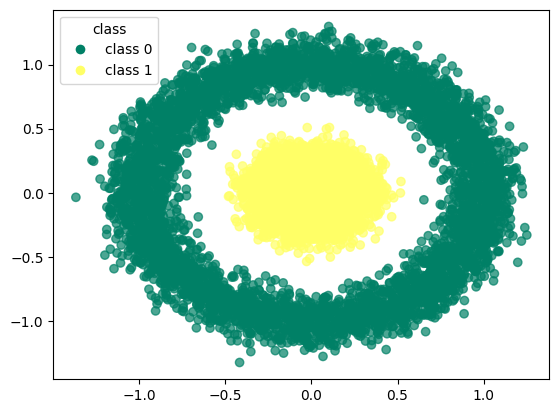

In [ ]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_circles['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

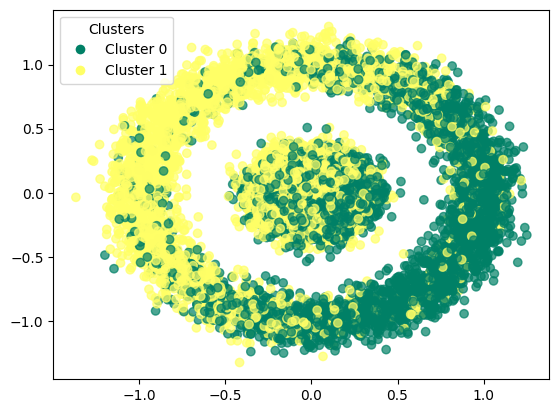

In [ ]:
scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_circles['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-0.43698252,  0.25240741, -0.22259863,  0.01961309,  0.23625121,
         0.45825867,  0.07149531,  0.04019116, -0.26200753, -0.00474536],
       [ 0.45445469, -0.26249958,  0.23149894, -0.0203973 , -0.2456974 ,
        -0.47658153, -0.07435396, -0.04179815,  0.27248356,  0.0049351 ]])

In [ ]:
print(confusion_matrix(df_circles['target'],df_circles['k_means']))

[[2468 2532]
 [2434 2566]]


In [ ]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### clustering with pca

In [ ]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

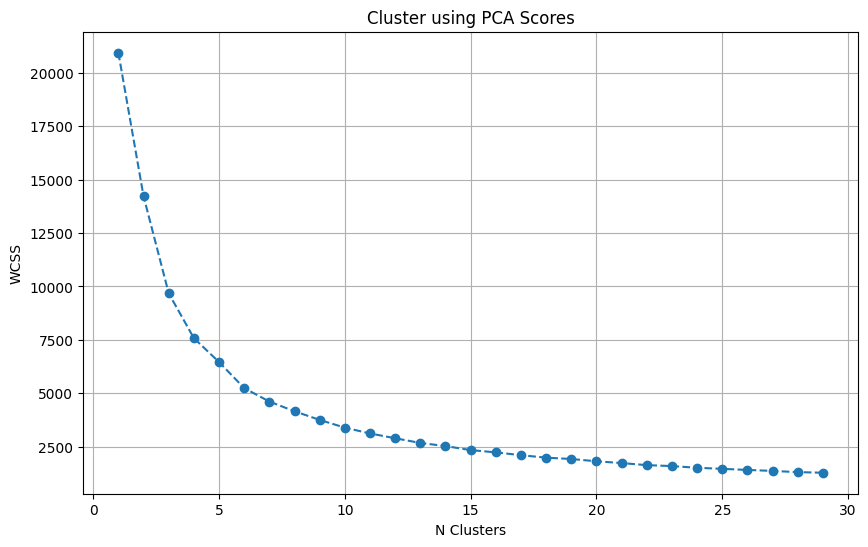

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [ ]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_pca_kmeans = df_circles.copy()

In [ ]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [ ]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1,0,0
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0,0,0
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0,1,1
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0,0,0
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1,1,0
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1,1,0
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1,0,1
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0,0,0


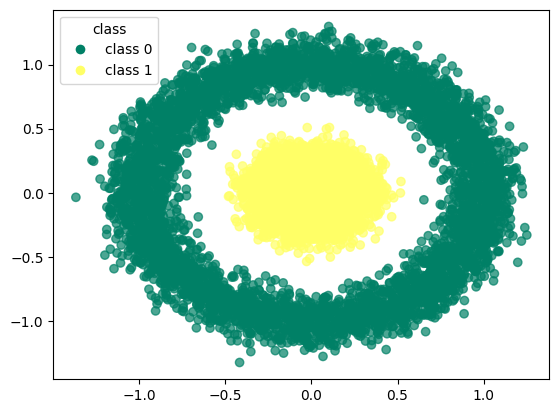

In [ ]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

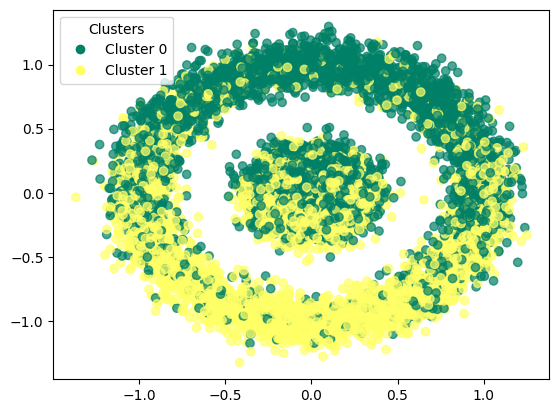

In [ ]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [ ]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.4928
accuracy after: 0.5072


In [ ]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1,0,1
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0,0,1
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0,1,0
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0,0,1
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1,1,1
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1,1,1
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1,0,0
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0,0,1


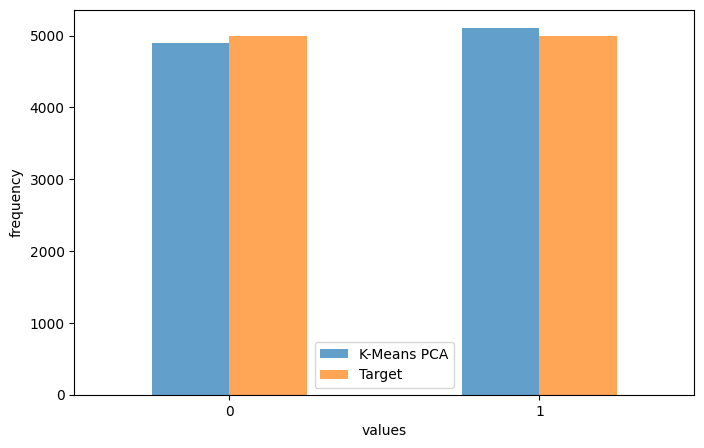

In [ ]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [ ]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2483 2517]
 [2411 2589]]


In [ ]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [ ]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      5000
           1       0.51      0.52      0.51      5000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



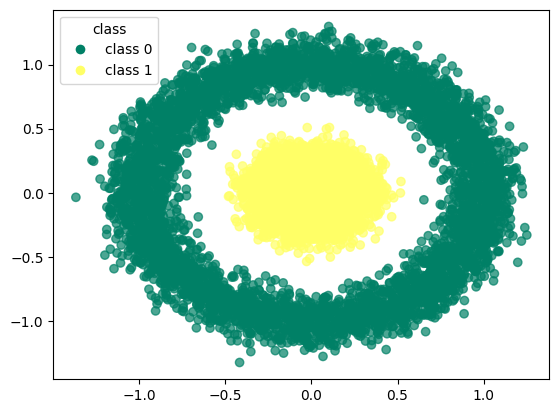

In [ ]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

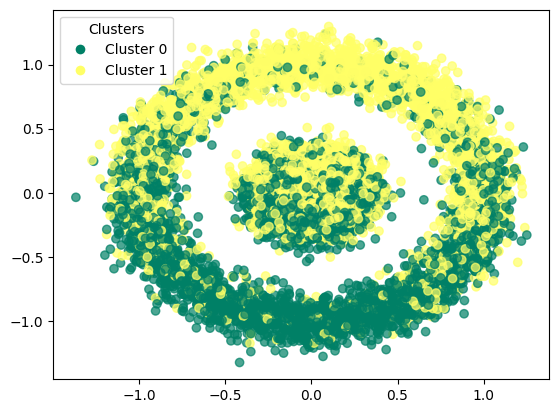

In [ ]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

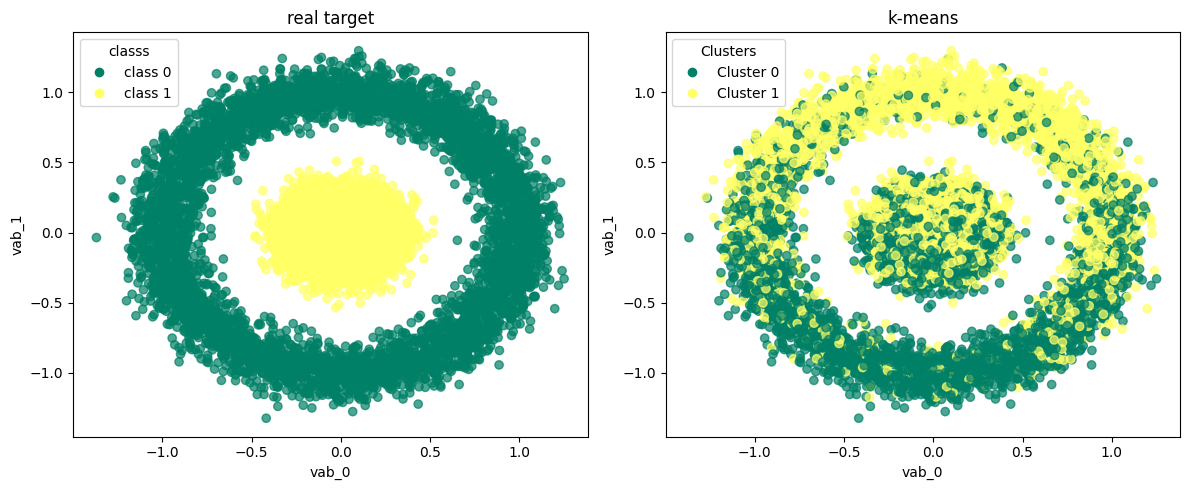

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

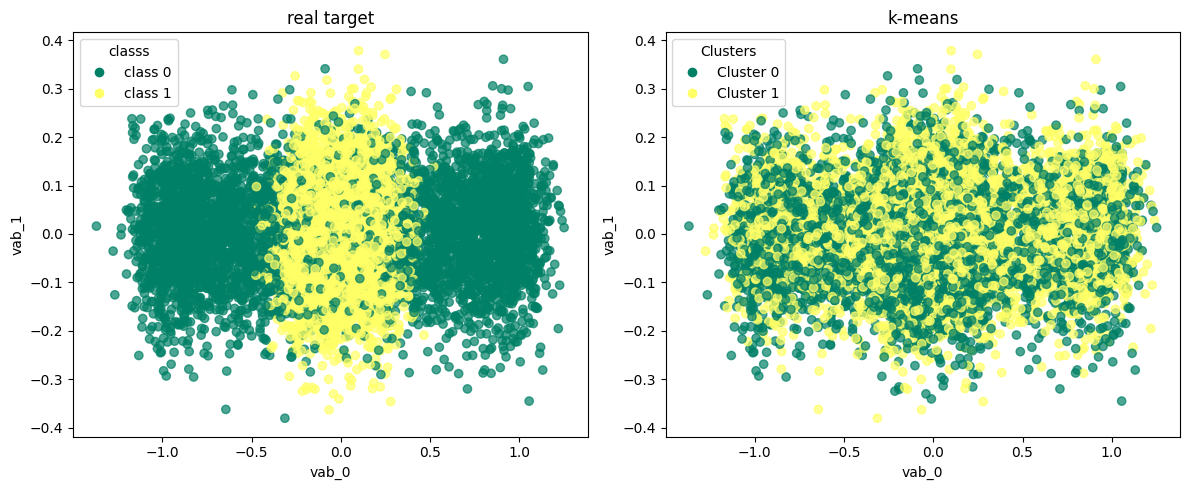

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

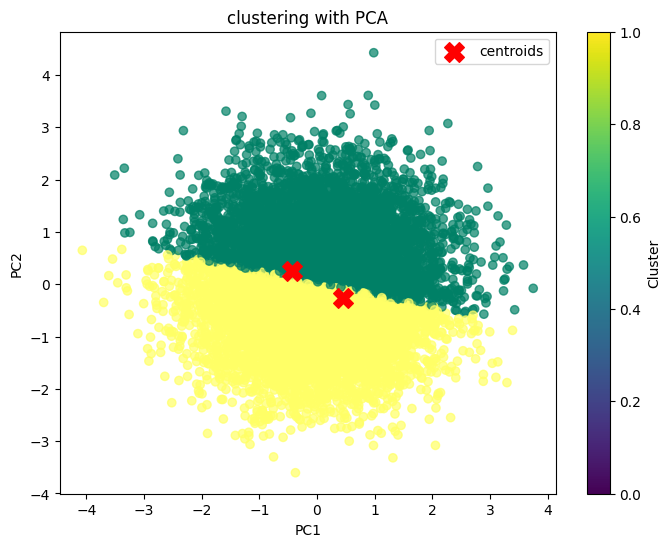

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

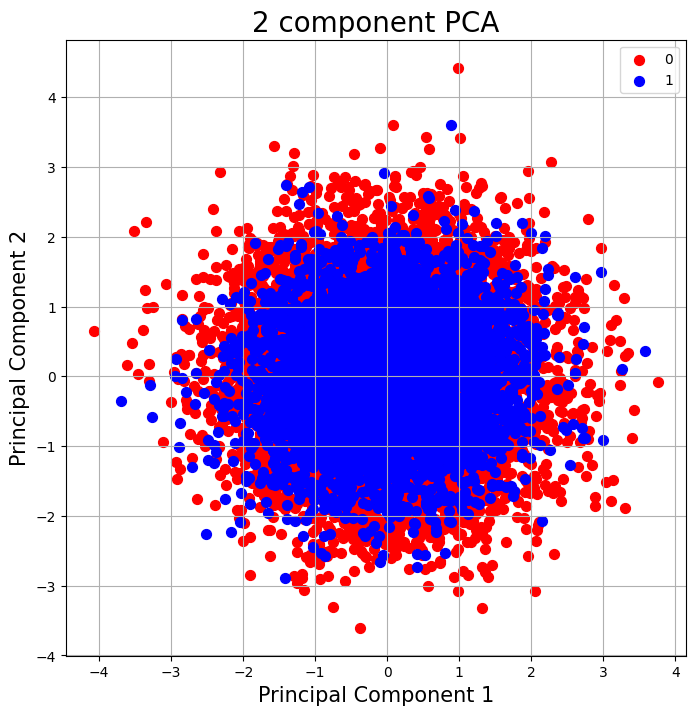

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [ ]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [ ]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_tsne_kmeans = df_circles.copy()

In [ ]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [ ]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1,0,0
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0,0,0
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0,1,0
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0,0,0
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1,1,1
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1,1,1
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1,0,0
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0,0,0


In [ ]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.5026
accuracy after: 0.5026


In [ ]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,-0.024621,0.095248,-0.042426,0.000725,-0.004800,0.021528,0.211604,0.005676,1,0,0
1,1.198440,-0.542104,-0.062714,-0.026242,-0.054809,-0.036249,-0.043834,0.037340,-0.003939,-0.156643,0,0,0
2,-0.618907,0.728517,-0.227873,-0.026078,-0.267110,-0.047183,0.034222,0.131580,0.103725,0.026043,0,1,0
3,1.070839,-0.340617,0.006377,0.109977,0.031721,-0.089536,-0.069750,0.020370,0.227670,-0.020902,0,0,0
4,0.843196,-0.502865,-0.003128,-0.094342,-0.016979,0.019079,0.115938,-0.141621,0.065223,0.151516,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,0.165141,-0.049078,0.037491,0.062779,-0.061494,0.040862,-0.079313,-0.070665,1,1,1
9996,0.239543,0.141312,-0.011689,0.226685,0.026129,0.090837,-0.129372,0.118910,0.127751,0.079488,1,1,1
9997,0.108542,0.082195,-0.035016,-0.216702,-0.225467,0.015151,0.001528,-0.060991,0.008157,-0.125121,1,0,0
9998,0.483035,0.891054,0.112691,0.018887,0.071319,-0.200067,-0.014180,-0.146389,-0.043059,0.003051,0,0,0


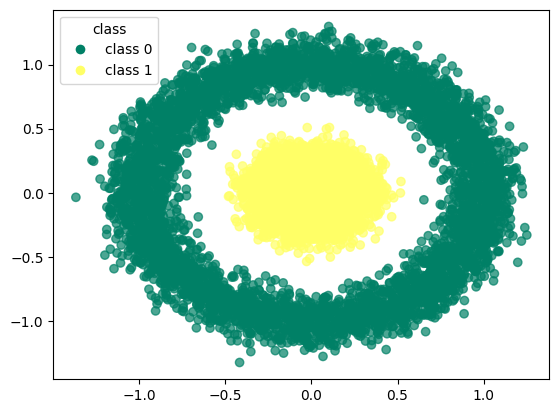

In [ ]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

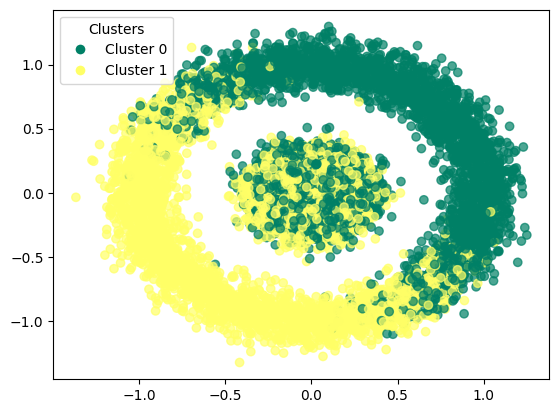

In [ ]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0],df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'],cmap='summer',alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

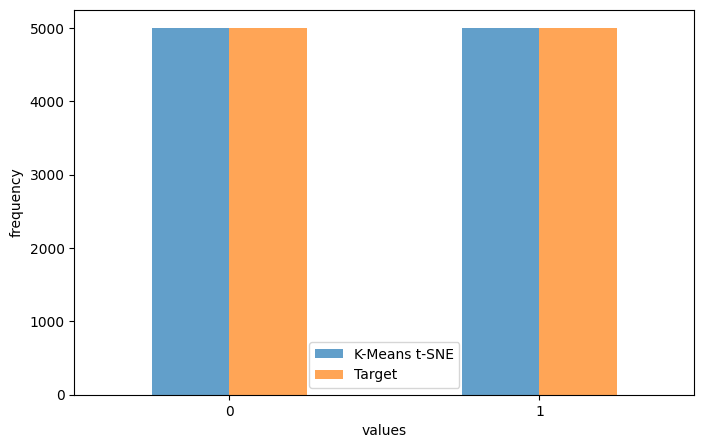

In [ ]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [ ]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[2513 2487]
 [2487 2513]]


In [ ]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5000
           1       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [ ]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      5000
           1       0.51      0.52      0.51      5000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [ ]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

